In [2]:
import pandas as pd

In [3]:
df_tratado = pd.read_csv('fake_news_fakebrcorpus.csv', sep=';', encoding='utf-8')

In [4]:
df_tratado.head()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake
0,1,O Podemos decidiu expulsar o deputado federal...,Naira Trindade\r\n,http://politica.estadao.com.br/blogs/coluna-do...,politica\r\n,168,107,None\r\n,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,0
1,2,"Bolsonaro é um liberal completo, diz president...",Marco Rodrigo Almeida\r\n,http://www1.folha.uol.com.br/poder/2018/01/194...,politica\r\n,1028,474,None\r\n,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,0
2,3,Ministro do STF libera Andrea Neves de prisão ...,"Fernando Zuba , Pedro Ângelo E Renan Ramalho\r\n",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica\r\n,540,232,None\r\n,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,0
3,4,"Apesar da abundância, cresce preocupação com p...","Por Anderson Viegas, G1 MS \r\n",https://g1.globo.com/mato-grosso-do-sul/notici...,politica\r\n,8634,2199,0\r\n,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,0
4,5,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Por BBC \r\n,https://g1.globo.com/educacao/noticia/por-que-...,politica\r\n,955,452,0\r\n,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,0


In [5]:
df_politica = df_tratado.loc[df_tratado["category"]=='politica\r\n']

In [6]:
df_politica.tail()

,seq,texto normalizado,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,fake
7189,7190,Caiu a máscara do Prof. Villa da Jovem Pan. Ví...,None\r\n,https://afolhabrasil.com.br/politica/caiu-masc...,politica\r\n,96,63,0\r\n,11,0,27,1,1,1,2,0.0,0.052632,0.741176,1
7192,7193,"Deputado e senador pedem para ""abrir mão"" do f...",None\r\n,https://www.diariodobrasil.org/deputado-e-sena...,politica\r\n,187,109,0\r\n,25,0,47,11,5,1,8,0.0,0.222222,0.712418,1
7195,7196,"FT: ""O julgamento de um populista que usou din...",None\r\n,https://www.diariodobrasil.org/ft-o-julgamento...,politica\r\n,185,101,0\r\n,27,0,46,9,4,4,10,0.0,0.178082,0.619632,1
7196,7197,Nota fiscal emitida pela Petrobras mostra que ...,None\r\n,https://www.diariodobrasil.org/nota-fiscal-emi...,politica\r\n,148,86,1\r\n,19,0,38,9,2,4,2,0.0,0.192982,0.651515,1
7197,7198,"Estão estancando a sangria da ""Lava-Jato"" bem ...",None\r\n,https://www.diariodobrasil.org/estao-estancand...,politica\r\n,313,181,0\r\n,43,2,76,14,8,6,17,0.0,0.184874,0.665441,1


In [7]:
df_politica.shape

(4180, 19)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
import numpy as np

#normalizes attributes frequencies
def normalizeData(data):
	rows_sum = np.sum(data, axis=1)
	data = (data.T / rows_sum).T
	return data

In [11]:
#removes attributes with frequency under min_freq on the dataset
def removeMinFreq(data, labels, min_freq = 1):
    # counting no. of ocurrences per word
    cols_sum = np.sum(data, axis=0)

    #creating an array with indexes of columns that must be deleted 
    del_indexes = []
    #for each val[i] in the cols_sum
    for i, val in zip(range(len(cols_sum)), cols_sum):
        #if that val is smaller than the minimun freq. insert i into the array
        if val < min_freq:
            del_indexes.append(i)

    #deleting columns with minimum frequency smaller than x
    #calls np.delete on the array, asking it to delete all columns with indexes given by del_indexes
    data = np.delete(data,del_indexes,1) 
    labels = np.delete(labels,del_indexes,0)
    return (data, labels)

In [96]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

def classificar_texto(pipe, texto, coluna_texto, coluna_classificacao,isXGB):
    
    #treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words_df,
    #                                                          texto[coluna_classificacao],
    #                                                          test_size=0.20,
    #                                                          random_state = 42,shuffle = True, stratify = texto[coluna_classificacao])
    
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state = 42)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(texto[coluna_texto], texto[coluna_classificacao]):
        treino_kf = texto[coluna_texto].values[train_index]
        classe_treino_kf = texto[coluna_classificacao].values[train_index]
        teste_kf = texto[coluna_texto].values[test_index]
        classe_teste_kf = texto[coluna_classificacao].values[test_index]
    
        y_pred = []
        predictions = []
    
        if(isXGB == 1):
            pipe.fit(treino_kf, classe_treino_kf)
            y_pred = pipe.predict(teste_kf)
            predictions = [round(value) for value in y_pred]
        else: 
            pipe.fit(treino_kf, classe_treino_kf)
            predictions = pipe.predict(teste_kf)
        
        for predict in predictions:
            all_predictions.append(predict)
            
        for clas_teste in classe_teste_kf:
            all_classes_tests.append(clas_teste)

    # evaluate predictions
    print ("Accuracy:", accuracy_score(all_classes_tests, all_predictions))
    print ("Precision:", precision_score(all_classes_tests, all_predictions))
    print (classification_report(all_classes_tests, all_predictions))
    print (confusion_matrix(all_classes_tests, all_predictions))
    
    

In [32]:
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):

    token_espaco = tokenize.WhitespaceTokenizer()
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()    

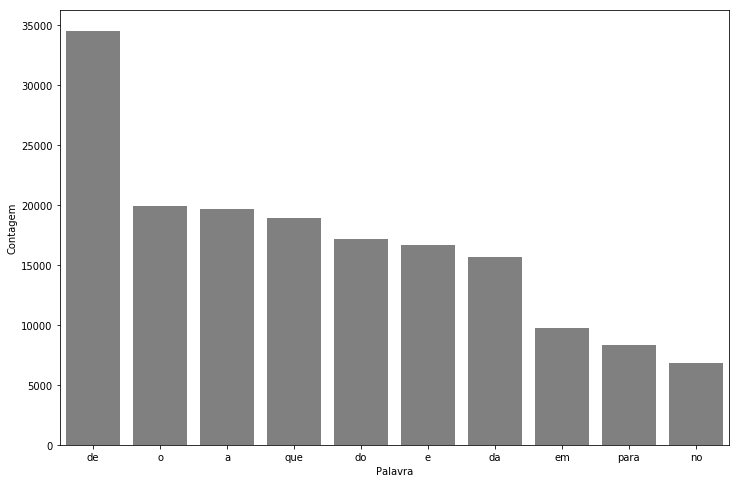

In [14]:
pareto(df_politica, "texto normalizado", 10)

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [13]:
from nltk import tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation
import unidecode
import re


def limpeza(texto,coluna):
    stop_words_pt = nltk.corpus.stopwords.words("portuguese")
    stemmer = SnowballStemmer("portuguese")
    #stemmer = nltk.RSLPStemmer()
    token = tokenize.WordPunctTokenizer()

    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)

    pontuacao_stopwords = pontuacao + stop_words_pt
    stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

    #Transformando para minusculo, removendo stop words e pontuacao e realizando stemetização    
    
    frase_processada = list()
    for frase in texto[coluna]:
        nova_frase = list()
        palavras_texto = token.tokenize(frase.lower())
        for palavra in palavras_texto:
            palavra_sem_numero = re.sub('[0-9]', '' , palavra)
            palavra_sem_acento = unidecode.unidecode(palavra_sem_numero)
            if ((len(palavra_sem_acento) > 0) and (palavra_sem_acento not in stopwords_sem_acento) and palavra_sem_acento.isalpha()):
                palavra_stem = stemmer.stem(palavra_sem_acento)
                if(len(palavra_stem) > 1):
                    nova_frase.append(palavra_stem)
        frase_processada.append(' '.join(nova_frase))
    
    return frase_processada

In [14]:
import string
def limpeza2(texto,coluna):
    with open('var/stopwords.txt') as f:
        cachedStopWords = f.read()
        stemmer = nltk.stem.SnowballStemmer('portuguese')
        translator = str.maketrans({key:' ' for key in string.punctuation})
    frase_processada = list()
    for frase in texto[coluna]:
        result = ''
        result = re.sub('[0-9]', '' , frase.translate(translator)).lower()
        result = ' '.join([stemmer.stem(word) for word in result.split() if word not in cachedStopWords])
        frase_processada.append(''.join(result))
    return frase_processada

In [15]:
df_politica['texto preprocessado2'] = limpeza2(df_politica,"texto normalizado")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_politica['texto preprocessado2'].head()

0    pod decid expuls deput federal carl gaguim par...
1    bolsonar é liberal complet diz president psl p...
2    ministr stf lib andre nev prisã domicili decis...
3    apes abund cresc preocup preserv font uso raci...
4    harvard mit lev dilm mor suplicy eua megaconfe...
Name: texto preprocessado2, dtype: object

In [86]:
df_politica['texto preprocessado'] = limpeza(df_politica,"texto normalizado")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
df_politica['texto preprocessado'].head()

0    pod decid expuls deput federal carl gaguim par...
1    bolsonar liberal complet diz president psl par...
2    ministr stf lib andre nev prisa domicili decis...
3    apes abundanc cresc preocupaca preservaca font...
4    harvard mit levara dilm mor suplicy eua megaco...
Name: texto preprocessado, dtype: object

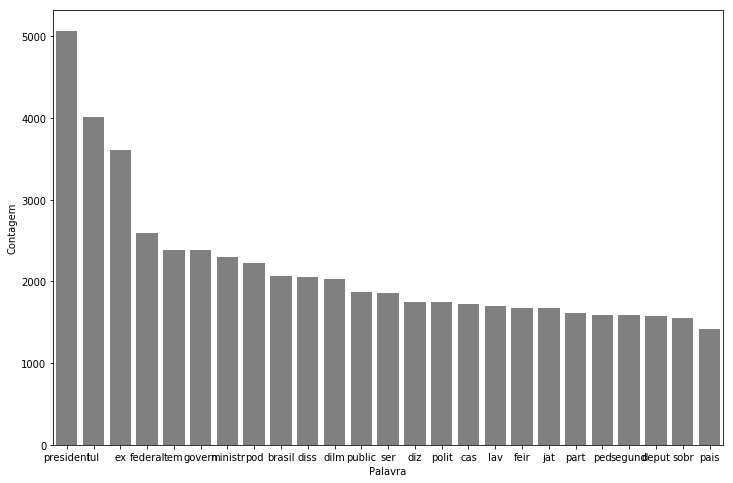

In [140]:
pareto(df_politica, "texto preprocessado", 25)

In [92]:
countV = CountVectorizer(lowercase=False, max_features=1000)
tfidfV = TfidfVectorizer(lowercase=False, max_features=1000)

In [93]:
regressao_logistica = LogisticRegression(solver = "lbfgs")

In [94]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', regressao_logistica),
    ])


In [97]:
classificar_texto(pipe,df_politica, "texto preprocessado2", "fake",0)

Accuracy: 0.8983253588516746
Precision: 0.9015918958031838
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2090
           1       0.90      0.89      0.90      2090

   micro avg       0.90      0.90      0.90      4180
   macro avg       0.90      0.90      0.90      4180
weighted avg       0.90      0.90      0.90      4180

[[1886  204]
 [ 221 1869]]


In [78]:
regressao_logistica = LogisticRegression(solver = "lbfgs")

classificar_texto(pipe,df_politica, "texto preprocessado2", "fake",0)

Accuracy: 0.8978468899521531
Precision: 0.9018849685838569
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2090
           1       0.90      0.89      0.90      2090

   micro avg       0.90      0.90      0.90      4180
   macro avg       0.90      0.90      0.90      4180
weighted avg       0.90      0.90      0.90      4180

[[1887  203]
 [ 224 1866]]


In [95]:
classificar_texto(pipe,df_politica, "texto preprocessado", "fake",0)

0.8361244019138756


In [ ]:
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier(random_state=0,learning_rate = 0.1,max_depth=5,n_estimators=300)

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', gb),
    ])

classificar_texto(pipe,df_politica, "texto preprocessado", "fake",0)

In [80]:
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier(random_state=0,learning_rate = 0.1,max_depth=5,n_estimators=300)

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', gb),
    ])

classificar_texto(pipe,df_politica, "texto preprocessado2", "fake",0)

Accuracy: 0.8720095693779905
Precision: 0.8686581318160266
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2090
           1       0.87      0.88      0.87      2090

   micro avg       0.87      0.87      0.87      4180
   macro avg       0.87      0.87      0.87      4180
weighted avg       0.87      0.87      0.87      4180

[[1813  277]
 [ 258 1832]]


In [84]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.1)

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', xbc),
    ])

classificar_texto(pipe,df_politica, "texto preprocessado2", "fake",1)


Accuracy: 0.8782296650717704
Precision: 0.8816996619990343
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2090
           1       0.88      0.87      0.88      2090

   micro avg       0.88      0.88      0.88      4180
   macro avg       0.88      0.88      0.88      4180
weighted avg       0.88      0.88      0.88      4180

[[1845  245]
 [ 264 1826]]


In [92]:
classificar_texto(gb,countV,df_politica, "texto preprocessado", "fake",0)

0.8576555023923444


In [ ]:
from sklearn.svm import SVC,LinearSVC
#svc = SVC(kernel='poly', degree=4, gamma = 'auto')
svc = LinearSVC(random_state=0)


pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', svc),
    ])



classificar_texto(pipe,df_politica, "texto preprocessado2", "fake",0)

In [ ]:
classificar_texto(pipe,df_politica, "texto preprocessado", "fake",0)

In [88]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.1)

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classificador', xbc),
    ])


classificar_texto(pipe,df_politica, "texto preprocessado", "fake",1)

Accuracy: 0.8849282296650718
Precision: 0.8832777513101477
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2090
           1       0.88      0.89      0.89      2090

   micro avg       0.88      0.88      0.88      4180
   macro avg       0.88      0.88      0.88      4180
weighted avg       0.88      0.88      0.88      4180

[[1845  245]
 [ 236 1854]]
